In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from sklearnex import patch_sklearn
patch_sklearn()
plt.style.use('seaborn-poster')
plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
data_features = pd.read_csv("./data/features.csv")
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")
data_store = pd.read_csv("./data/stores.csv")

# Brief some info

In [4]:
# !pip freeze

In [5]:
data_train = pd.merge(data_train, data_store, on='Store', how='left')
data_test = pd.merge(data_test, data_store, on='Store', how='left')

In [6]:
data_features = data_features.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [7]:
data_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [8]:
data_train = pd.merge(data_train, data_features, on=['Store', 'Date', 'IsHoliday'], how='left')
data_test = pd.merge(data_test, data_features, on=['Store', 'Date', 'IsHoliday'], how='left')

In [9]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [11]:
# data_train = data_train[data_train['Weekly_Sales']>0]

# Analysis

In [12]:
# data_train.groupby(['Store', 'Dept', 'IsHoliday'])['Weekly_Sales']\
# .mean().reset_index().sort_values(["Store","Dept","IsHoliday"], ascending=[True, True, False])

In [13]:
def extract_week(df):
    Date='Date'
    df[Date] =  pd.to_datetime(df[Date], infer_datetime_format=True)
    df['week'] = pd.DatetimeIndex(df[Date]).week
    df['month'] = pd.DatetimeIndex(df[Date]).month
    df['year'] = pd.DatetimeIndex(df[Date]).year
    
    return df

In [14]:
#Date="Date"
extract_week(data_train)
extract_week(data_test)
# extract_week(val_df)

/tmp/ipykernel_7996/2448062171.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df[Date]).week


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,44,11,2012
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573,45,11,2012
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573,46,11,2012
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573,47,11,2012
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573,48,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,NaN,NaN,26,6,2013
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,NaN,NaN,27,7,2013
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,NaN,NaN,28,7,2013
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,NaN,NaN,29,7,2013


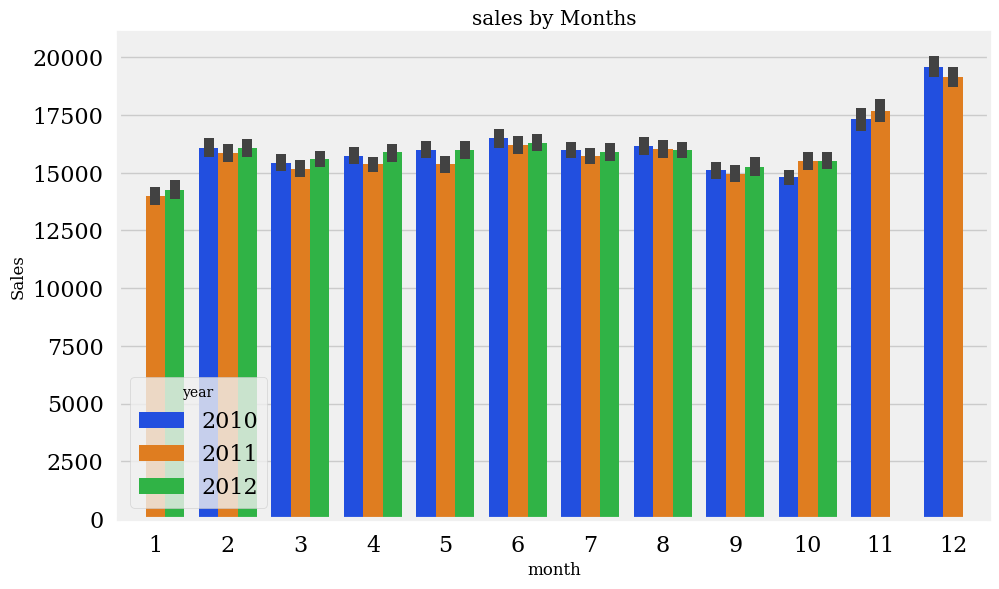

In [15]:
sns.barplot(data=data_train, x='month', y='Weekly_Sales', hue='year', palette='bright').set_title('sales by Months')
plt.ylabel("Sales")
plt.savefig("./sales_by_month.jpg", bbox_inches='tight', dpi=100)
plt.show()

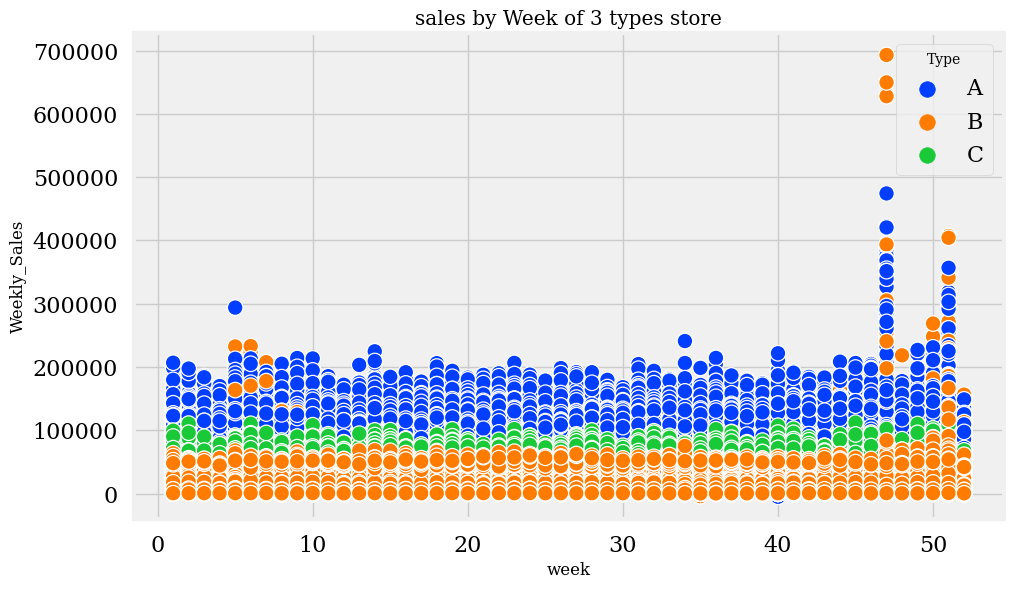

In [16]:
sns.scatterplot(data=data_train, x='week', y='Weekly_Sales', hue='Type', palette='bright').set_title('sales by Week of 3 types store')
plt.savefig("./sales_by_type.jpg", bbox_inches='tight', dpi=100)
plt.show()


In [17]:
temp = data_train.copy(deep=True)

In [18]:
temp['Date'] = temp["Date"].astype("datetime64")

In [19]:
temp = temp.set_index("Date")

In [20]:
temp.columns

x = temp[(temp.Store==1)&(temp.Dept==2)]

In [21]:
x[x.IsHoliday==1]

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Date,,,,,,,,,,,,,
2010-02-12,1,2,44682.74,True,A,151315,38.51,2.548,211.242170,8.106,6,2,2010
2010-09-10,1,2,45182.50,True,A,151315,78.69,2.565,211.495190,7.787,36,9,2010
2010-11-26,1,2,45681.98,True,A,151315,64.52,2.735,211.748433,7.838,47,11,2010
2010-12-31,1,2,35819.83,True,A,151315,48.43,2.943,211.404932,7.838,52,12,2010
2011-02-11,1,2,47595.35,True,A,151315,36.39,3.022,212.936705,7.742,6,2,2011
2011-09-09,1,2,43315.85,True,A,151315,76.00,3.546,215.861056,7.962,36,9,2011
2011-11-25,1,2,44259.59,True,A,151315,60.14,3.236,218.467621,7.866,47,11,2011
2011-12-30,1,2,43539.94,True,A,151315,44.55,3.129,219.535990,7.866,52,12,2011
2012-02-10,1,2,50581.06,True,A,151315,48.02,3.409,220.265178,7.348,6,2,2012


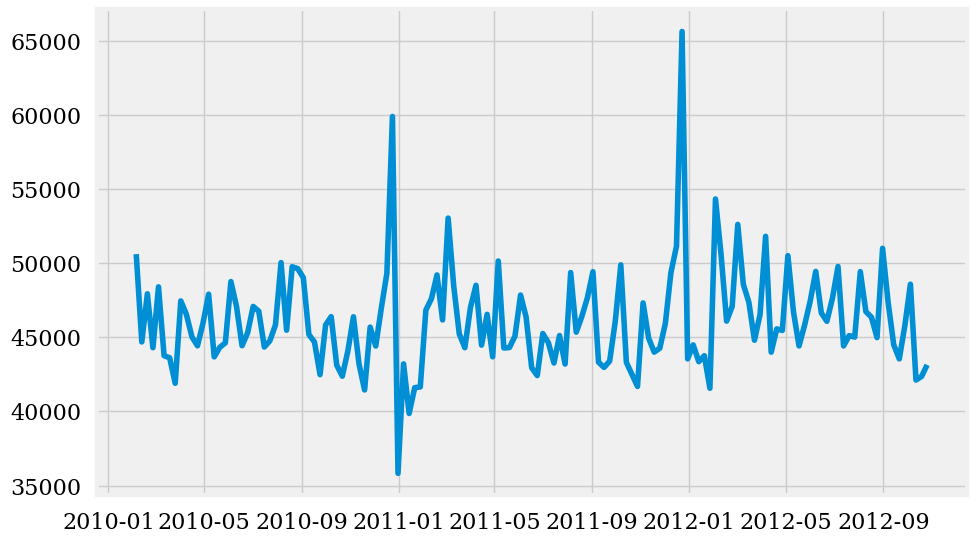

In [22]:
plt.plot(x["Weekly_Sales"])

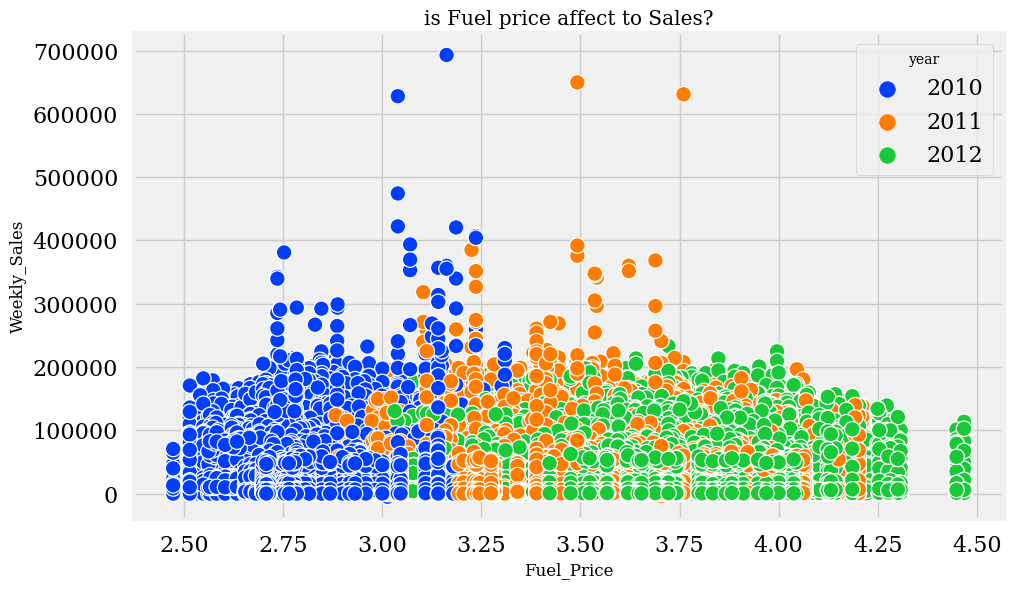

In [23]:
sns.scatterplot(data=data_train, x='Fuel_Price', y='Weekly_Sales', hue='year',palette='bright').set_title("is Fuel price affect to Sales?")
plt.savefig("./sales_by_Fuel.jpg", bbox_inches='tight', dpi=100)
plt.show()

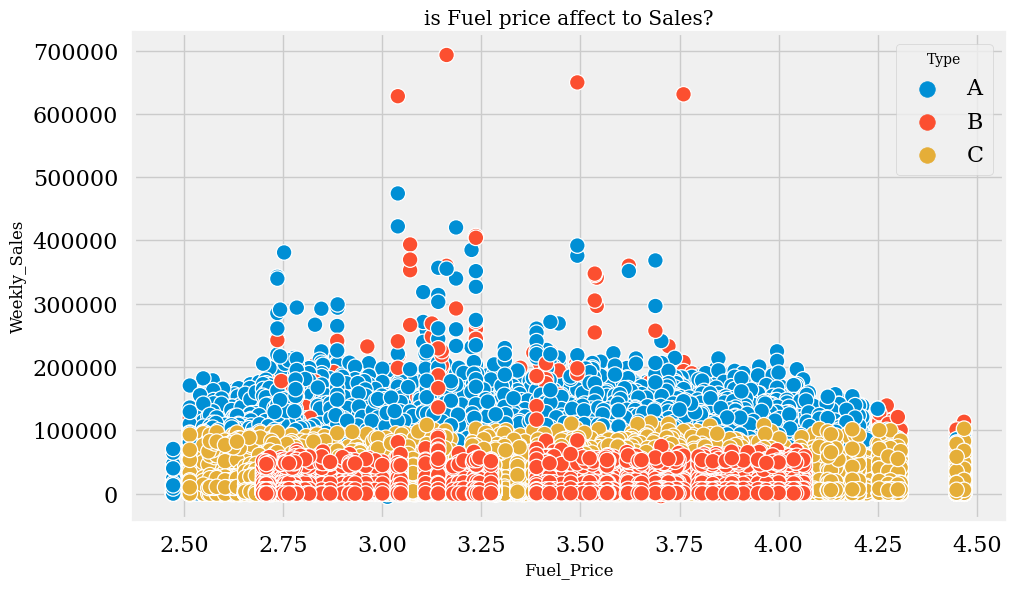

In [24]:
sns.scatterplot(data=data_train, x='Fuel_Price', y='Weekly_Sales', hue='Type').set_title("is Fuel price affect to Sales?")
plt.show()

## Is Tempurature affect to Sales?

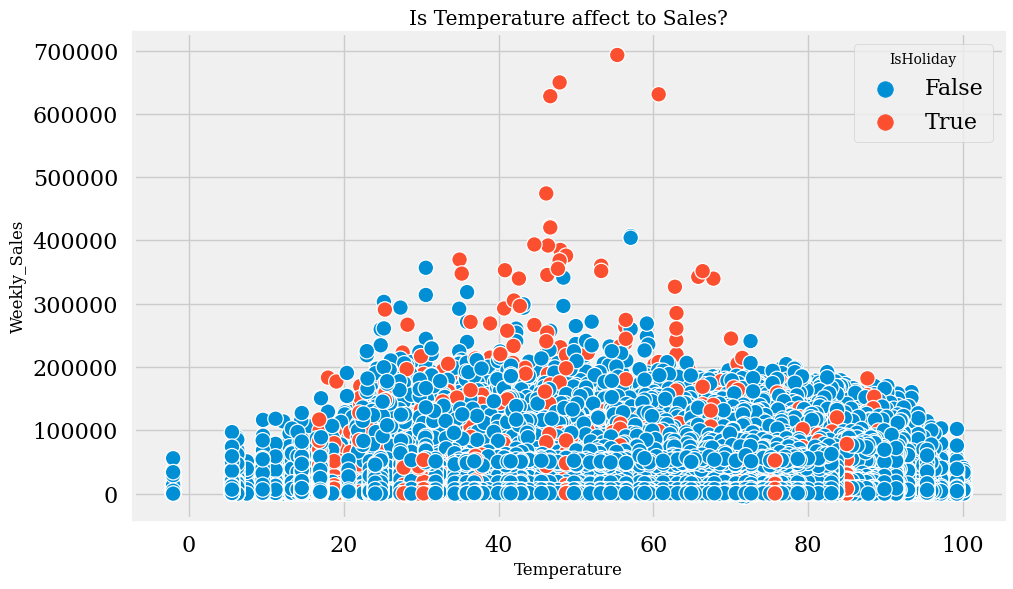

In [25]:


sns.scatterplot(data=data_train, x='Temperature', y='Weekly_Sales', hue='IsHoliday').set_title("Is Temperature affect to Sales?")
plt.savefig("./sales_by_temperature.jpg", bbox_inches='tight', dpi=100)
plt.show()

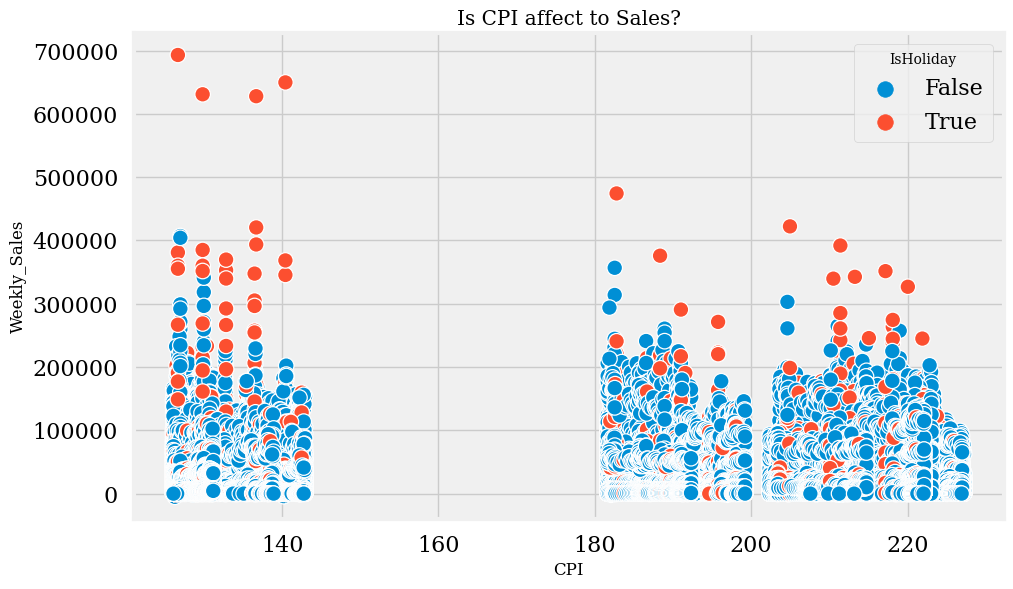

In [26]:
sns.scatterplot(data=data_train, x='CPI', y='Weekly_Sales', hue='IsHoliday').set_title("Is CPI affect to Sales?")
plt.savefig("./sales_by_cpi.jpg", bbox_inches='tight', dpi=100)
plt.show()

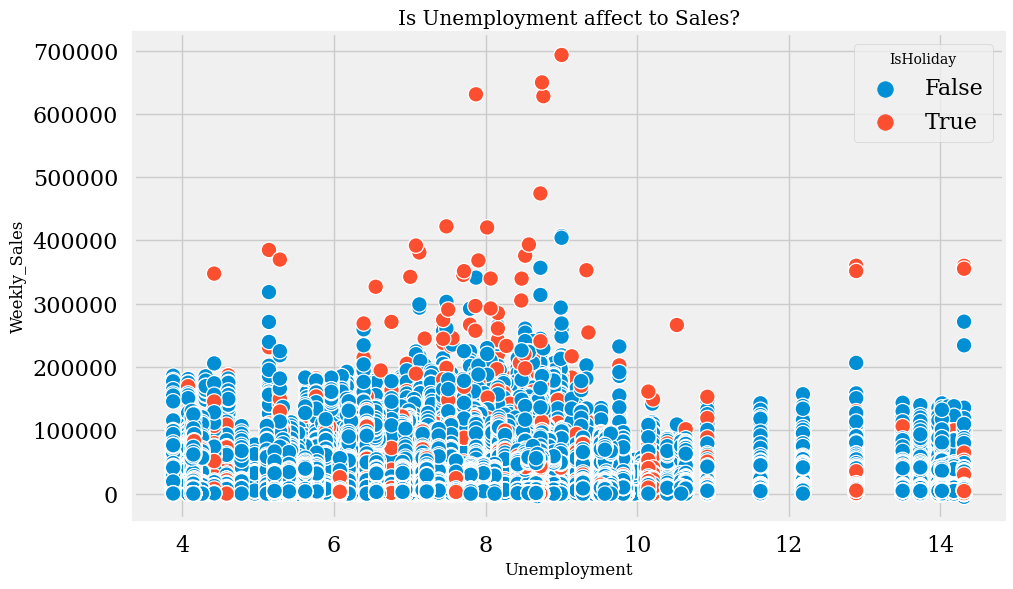

In [27]:
sns.scatterplot(data=data_train, x='Unemployment', y='Weekly_Sales', hue='IsHoliday').set_title("Is Unemployment affect to Sales?")
plt.savefig("./sales_by_unemployment.jpg", bbox_inches='tight', dpi=100)
plt.show()

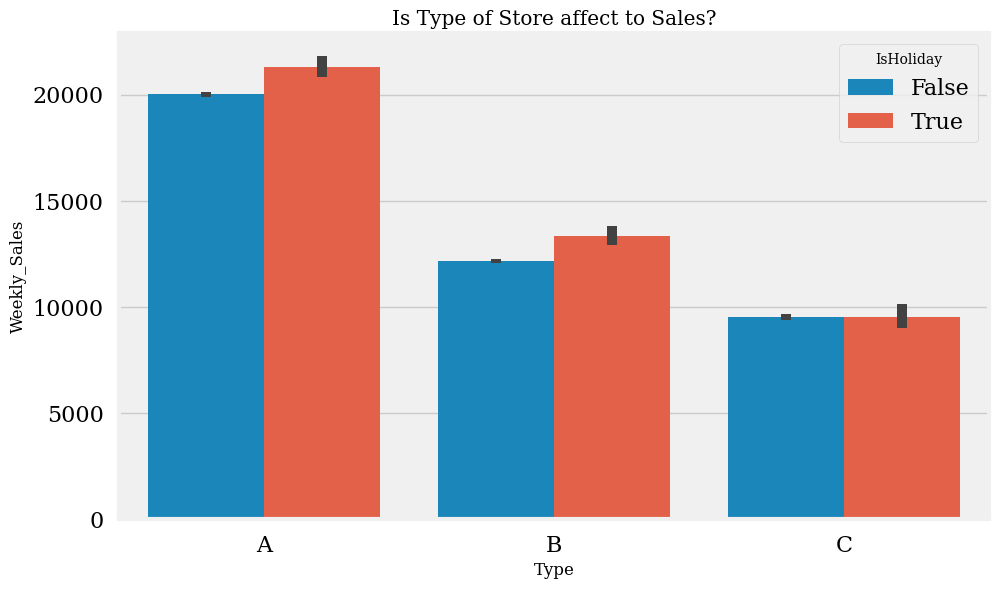

In [28]:
sns.barplot(data=data_train, x='Type', y='Weekly_Sales', hue='IsHoliday').set_title("Is Type of Store affect to Sales?")
plt.show()

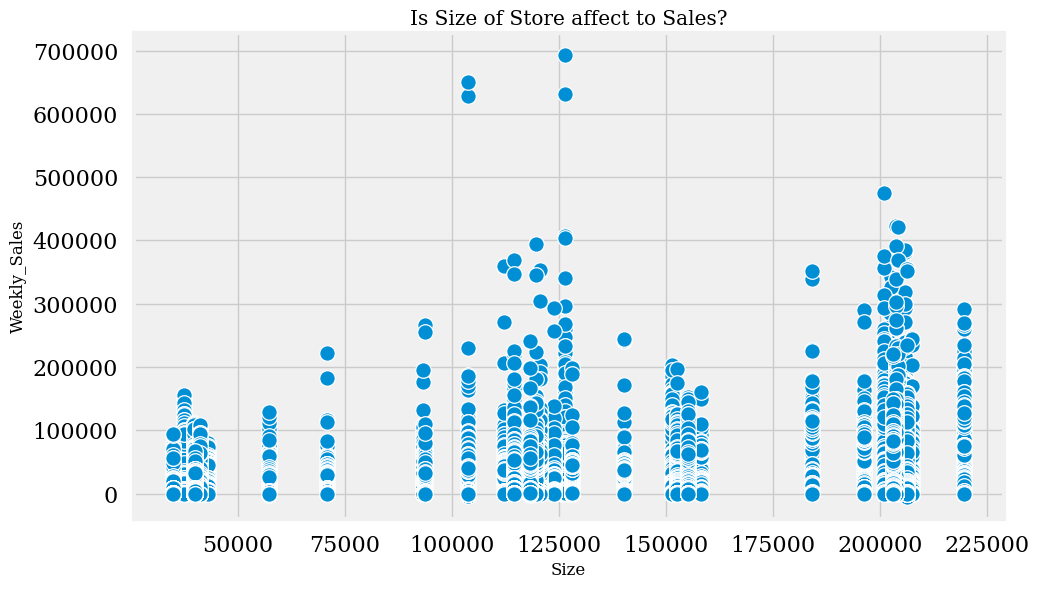

In [29]:
sns.scatterplot(data=data_train, x='Size', y='Weekly_Sales').set_title("Is Size of Store affect to Sales?")
plt.savefig("./sales_by_size_store.jpg", bbox_inches='tight', dpi=100)
plt.show()

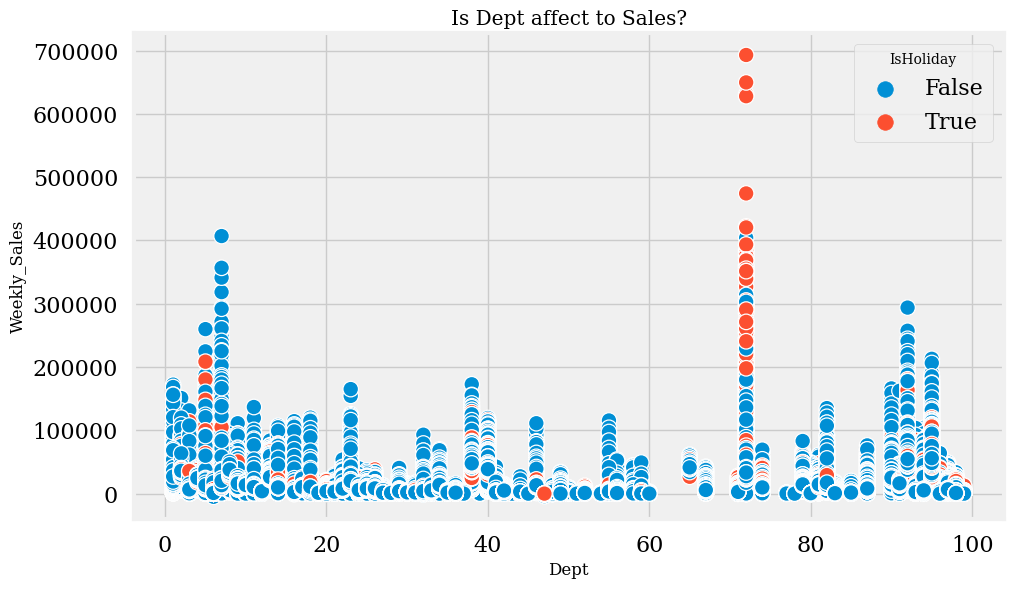

In [30]:
sns.scatterplot(data=data_train, x='Dept', y='Weekly_Sales', hue='IsHoliday').set_title("Is Dept affect to Sales?")
plt.savefig("./sales_by_dept.jpg", bbox_inches='tight', dpi=100)
plt.show()

In [31]:
data_train.Store.nunique(), data_train.Dept.nunique()

(45, 81)

In [32]:
data_train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,10,2012
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,192.308899,8.667,43,10,2012


In [33]:
data_train['Weekly_Sales'].shift(periods=-4)

0         21827.90
1         21043.39
2         22136.64
3         26229.21
4         57258.43
            ...   
421565     1076.80
421566         NaN
421567         NaN
421568         NaN
421569         NaN
Name: Weekly_Sales, Length: 421570, dtype: float64

In [34]:
data_train.groupby(['Store', 'Dept'])['Weekly_Sales'].count().reset_index(name="num_week")

,Store,Dept,num_week
0,1,1,143
1,1,2,143
2,1,3,143
3,1,4,143
4,1,5,143
...,...,...,...
3326,45,94,134
3327,45,95,143
3328,45,96,2
3329,45,97,143


In [35]:

x = data_train.groupby(['Store', 'Dept']).agg(min_date = ('Date', 'min'),
                                              max_date = ('Date', 'max')).reset_index()

# aggregations = {
#     'lst_buy_dt1': {
#         'max_lst_buy_dt': 'max',       
#         'min_lst_buy_dt': 'min',       
#     },
#     'purchase_amt': {
#         'tot_purchase': 'sum',
#     }
# }
# grouped_at_Cust = metro_sales.groupby(['cust_id', 'store_id', 'month']).agg(aggregations).reset_index()
# grouped_at_Cust.columns = grouped_at_Cust.columns.droplevel(0)

In [36]:
x.tail()

,Store,Dept,min_date,max_date
3326,45,94,2010-02-12,2012-10-26
3327,45,95,2010-02-05,2012-10-26
3328,45,96,2012-03-16,2012-09-14
3329,45,97,2010-02-05,2012-10-26
3330,45,98,2010-02-05,2012-10-26


In [37]:
def discrete_to_sequence(discrete_value_list: list, num_week=5):
    counter = 1
    targets = []
    features = []
    temp = []
    reversed_list = discrete_value_list[::-1]
    for index, value in enumerate(reversed_list):
        if counter == num_week+1:
            features.append(temp)
            temp = []
            counter = 1
        if counter == 1:
            targets.append(value)
        if (counter <= num_week + 1) and (counter > 1):
            temp.append(value)
        counter += 1
    return targets, features

In [38]:
sample_test = data_train[(data_train.Store==1)&(data_train.Dept==1)]
tg, ft = discrete_to_sequence(list(sample_test.Weekly_Sales.values))

In [39]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning."""
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = concat(cols, axis=1)
    agg.columns = names
        # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



values = list(sample_test.Weekly_Sales.values)
IsHoliday_values = list(sample_test.IsHoliday.values)
# values = [x for x in range(10)]
x = series_to_supervised(values, n_in=7)
y = series_to_supervised(IsHoliday_values, n_in=7)

In [40]:
# num_weeks = 12
# original_cols = ['Weekly_Sales', 'IsHoliday']
# df_result = pd.DataFrame()
# features = []
# for col in original_cols:
#     columns_name = []
#     values = list(sample_test[col].values)
#     df_feature = series_to_supervised(values, n_in=num_weeks)
#     for i in range(num_weeks, -1, -1):
#         new_name = col + f"_t_{i}"
#         columns_name.append(new_name)
#         if new_name != 'Weekly_Sales_t_0':
#             features.append(new_name)
#     df_feature.columns = columns_name
#     df_result = pd.concat([df_result, df_feature], axis=1)


In [41]:
data_train['address'] = data_train['Store'].astype(str) + data_train['Dept'].astype(str)

In [42]:
holidays_dates = {
        'super_bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
        'labor_day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
        'thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
        'christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'],
        'independence_day': ['2010-07-04', '2011-07-04', '2012-07-04','2013-07-04']
    }


In [43]:
holiday_mapping = {}
for key, value in holidays_dates.items():
    for date in value:
        date = pd.to_datetime(date)
        holiday_mapping[date] = key

In [44]:
address = data_train['address'].unique()

In [45]:
def data_to_feature(data: pd.DataFrame = sample_test, 
                    original_col: list = ['Weekly_Sales', 'IsHoliday'], 
                    num_past_weeks: int = 12):
    df_result = pd.DataFrame()
    features = []
    for col in original_col:
        columns_name = []
        values = list(data[col].values)
        df_feature = series_to_supervised(values, n_in=num_past_weeks)
        for i in range(num_past_weeks, -1, -1):
            new_name = col + f"_t_{i}"
            columns_name.append(new_name)
            if new_name != 'Weekly_Sales_t_0':
                features.append(new_name)
        df_feature.columns = columns_name
        df_result = pd.concat([df_result, df_feature], axis=1)
    return df_result, features

In [46]:
# final_result = pd.DataFrame()
# for loc in address:
#     temp_data = data_train[data_train['address']==loc]
#     temp_df, features = data_to_feature(data=temp_data, num_past_weeks=5)
#     temp_df['address'] = loc
#     final_result = pd.concat([final_result, temp_df], axis=0)

In [47]:
# final_result.head()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
# # target = "Weekly_Sales_t_0"
# train, dev = train_test_split(final_result, random_state=42, test_size=0.2)

In [50]:
# rf_model = RandomForestRegressor()

In [51]:
# rf_model.fit(train[features], train[target])

In [52]:
# prediction = rf_model.predict(train[features])
# print(mean_absolute_error(train[target], prediction))
# # print(mean_squared_error(train[target], prediction))

In [53]:
# gb_model = GradientBoostingRegressor()
# gb_model.fit(train[features], train[target])

In [54]:
# prediction = gb_model.predict(train[features])
# print(mean_absolute_error(train[target], prediction))
# print(mean_squared_error(train[target], prediction))

In [55]:
# lr_model = LinearRegression()
# lr_model.fit(train[features], train[target])
# prediction = lr_model.predict(train[features])
# print(mean_absolute_error(train[target], prediction))
# print(mean_absolute_error(train[target], prediction))
# # print(mean_squared_error(train[target], prediction))

# Evaluate on Dev Set

In [56]:
# prediction = rf_model.predict(dev[features])

In [57]:
# weights = np.where(dev['IsHoliday_t_0']==True, 5, 1)

In [58]:
# mean_absolute_error(dev[target], prediction, sample_weight=weights)

In [59]:
# data_train[data_train['Weekly_Sales']<0].shape

In [60]:
def convert_type_holiday(row):
    is_holiday = row['IsHoliday']
    date = row['Date']
    if (is_holiday == True) & (date in holiday_mapping):
        return holiday_mapping[date]
    if (is_holiday == True) & (date not in holiday_mapping):
        return "other_holiday"
    if is_holiday == False:
        return "normal_day"

In [61]:
data_train['type_holiday'] = data_train.apply(lambda row: convert_type_holiday(row), axis=1)

In [62]:
x = data_train.groupby(['type_holiday', 'year'])['Weekly_Sales'].mean().reset_index(name='mean_weekly_sales')

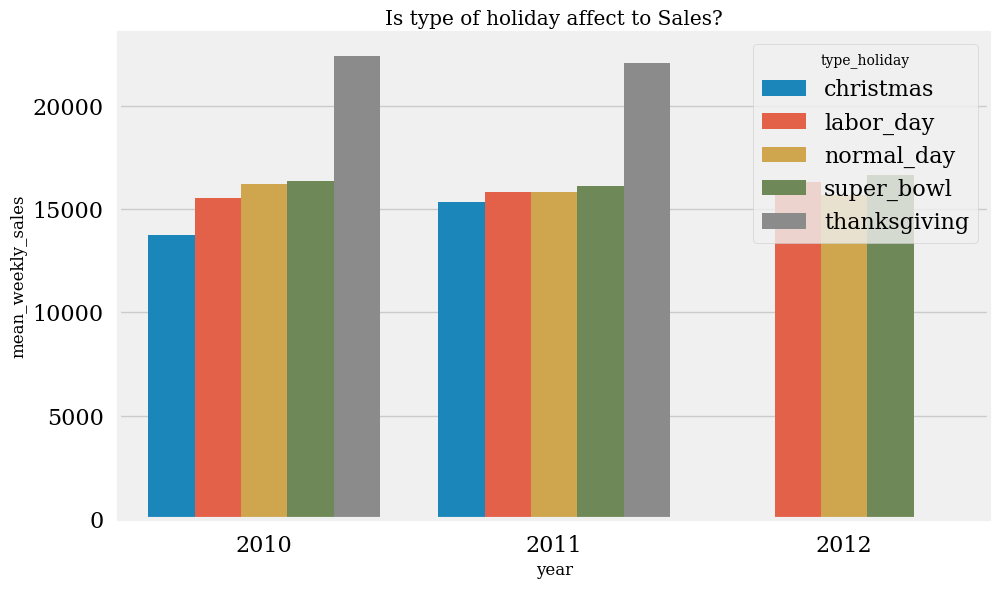

In [63]:
sns.barplot(data=x, x='year', y='mean_weekly_sales', hue='type_holiday').set_title("Is type of holiday affect to Sales?")
plt.savefig("type_of_holiday.jpg", bbox_inches='tight', dpi=100)
plt.show()

In [64]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

In [65]:
onehot_encoder.fit(data_train.type_holiday.values.reshape(-1, 1))

OneHotEncoder()

In [66]:
encoded_type_holiday = onehot_encoder.transform(data_train.type_holiday.values.reshape(-1, 1)).toarray()

In [67]:
onehot_encoder.get_feature_names()

array(['x0_christmas', 'x0_labor_day', 'x0_normal_day', 'x0_super_bowl',
       'x0_thanksgiving'], dtype=object)

In [68]:
type_holiday_df = pd.DataFrame(encoded_type_holiday, columns=onehot_encoder.get_feature_names())

In [69]:
data_train = pd.concat([data_train, type_holiday_df], axis=1)

In [70]:
statistic_std_by_week = data_train.groupby(['Store', 'Dept'])['week'].count().reset_index(name="num_week").sort_values("num_week")

In [71]:
statistic_std_by_week.num_week.describe(percentiles=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

count    3331.000000
mean      126.559592
std        40.212763
min         1.000000
5%         10.000000
10%        48.000000
20%       142.000000
30%       143.000000
40%       143.000000
50%       143.000000
60%       143.000000
70%       143.000000
80%       143.000000
90%       143.000000
100%      143.000000
max       143.000000
Name: num_week, dtype: float64

In [72]:
statistic_std_by_week[statistic_std_by_week.num_week<=48]

,Store,Dept,num_week
3170,43,55,1
1295,17,99,1
1332,18,39,1
1340,18,48,1
2464,33,27,1
...,...,...,...
1422,19,51,44
2753,37,49,45
2244,30,23,46
833,11,99,48


In [73]:
data_train.iloc[:round(421570*0.7),].Date.max()

Timestamp('2012-10-26 00:00:00')

In [74]:
294132/421570

0.6977061935147187

In [75]:
### From the insight about we decide to choose the list of features:
### Store, Dept, 

In [76]:
break_date1 = pd.Timestamp("2011-12-31")
break_date2 = pd.Timestamp("2012-06-05")

train_df = data_train[data_train["Date"] <= break_date1]
val_df = data_train.loc[(data_train["Date"] > break_date1) & (data_train["Date"] <= break_date2)]
test_df = data_train[data_train["Date"] > break_date2]

In [77]:
train_df.shape, val_df.shape, test_df.shape

((294132, 21), (65300, 21), (62138, 21))

In [78]:
data_train.groupby(['Store', 'Dept'])['Date'].apply(max).reset_index(name='Date').sort_values('Date').head(50)

,Store,Dept,Date
2563,34,78,2010-02-05
2706,36,85,2010-02-12
1027,14,43,2010-02-12
1340,18,48,2010-02-19
362,5,78,2010-02-26
651,9,51,2010-03-05
2470,33,36,2010-03-12
2484,33,71,2010-03-12
114,2,39,2010-03-19
673,9,93,2010-04-02


In [79]:
def maping_type(df):
    df['Type'] = df['Type'].map({'A':'1',
                                 'B':'2',
                                 'C':'3'})
    return df

maping_type(train_df)
maping_type(val_df)
maping_type(test_df)


/tmp/ipykernel_7996/1216798863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].map({'A':'1',


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,week,month,year,address,type_holiday,x0_christmas,x0_labor_day,x0_normal_day,x0_super_bowl,x0_thanksgiving
122,1,1,2012-06-08,17666.00,False,1,151315,78.30,3.452,221.749484,...,23,6,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
123,1,1,2012-06-15,17558.82,False,1,151315,79.35,3.393,221.762642,...,24,6,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
124,1,1,2012-06-22,16633.41,False,1,151315,78.39,3.346,221.803021,...,25,6,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
125,1,1,2012-06-29,15722.82,False,1,151315,84.88,3.286,221.843400,...,26,6,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
126,1,1,2012-07-06,17823.37,False,1,151315,81.57,3.227,221.883779,...,27,7,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2,118221,64.88,3.997,192.013558,...,39,9,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421566,45,98,2012-10-05,628.10,False,2,118221,64.89,3.985,192.170412,...,40,10,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421567,45,98,2012-10-12,1061.02,False,2,118221,54.47,4.000,192.327265,...,41,10,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421568,45,98,2012-10-19,760.01,False,2,118221,56.47,3.969,192.330854,...,42,10,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0


In [80]:
def convert_to_int(df):
    ## convert them into integer  
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df

convert_to_int(train_df)
convert_to_int(test_df)
convert_to_int(val_df)

/tmp/ipykernel_7996/1305989408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type']=df['Type'].astype(int)
/tmp/ipykernel_7996/1305989408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsHoliday']=df['IsHoliday'].astype(int)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,week,month,year,address,type_holiday,x0_christmas,x0_labor_day,x0_normal_day,x0_super_bowl,x0_thanksgiving
100,1,1,2012-01-06,16567.69,0,1,151315,49.01,3.157,219.714258,...,1,1,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
101,1,1,2012-01-13,16894.40,0,1,151315,48.53,3.261,219.892526,...,2,1,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
102,1,1,2012-01-20,18365.10,0,1,151315,54.11,3.268,219.985689,...,3,1,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
103,1,1,2012-01-27,18378.16,0,1,151315,54.26,3.290,220.078852,...,4,1,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
104,1,1,2012-02-03,23510.49,0,1,151315,56.55,3.360,220.172015,...,5,2,2012,11,normal_day,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421544,45,98,2012-05-04,694.25,0,2,118221,55.21,3.951,190.922212,...,18,5,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421545,45,98,2012-05-11,893.60,0,2,118221,61.24,3.889,190.976417,...,19,5,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421546,45,98,2012-05-18,745.44,0,2,118221,66.30,3.848,190.996448,...,20,5,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0
421547,45,98,2012-05-25,795.94,0,2,118221,67.21,3.798,191.002810,...,21,5,2012,4598,normal_day,0.0,0.0,1.0,0.0,0.0


In [81]:
features = ['Store', 'Type', 'Size', 'week','Dept','year', 
'x0_christmas', 'x0_labor_day', 'x0_normal_day','x0_super_bowl', 'x0_thanksgiving']
target = ['Weekly_Sales']

In [82]:
data_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'month',
       'year', 'address', 'type_holiday', 'x0_christmas', 'x0_labor_day',
       'x0_normal_day', 'x0_super_bowl', 'x0_thanksgiving'],
      dtype='object')

In [83]:
def WMAE(is_holiday: list, real: np.array, predicted: np.array):
    weights = []
    for item in is_holiday:
        if item == 1:
            weight = 5
        else:
            weight = 1
        weights.append(weight)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [84]:
def model_base_compare(models: dict, train_data: tuple, val_data: tuple, test_data:tuple, param: dict = None):
    X_train, y_train, Is_Holiday_train = train_data
    X_val, y_val, Is_Holiday_val = val_data
    X_test, y_test, Is_Holiday_test = test_data
    
    for name, model in models.items():
        if name =='LightGBM':
            if param is None:
                param = {'num_leaves': 5, 'objective': 'regression'}
                param['metric'] = 'l2'
                param['num_boost_round'] = 100
            train_ds = lgb.Dataset(X_train, label=y_train)
            val_ds = lgb.Dataset(X_val, label=y_val)
            test_ds = lgb.Dataset(X_test, label=y_test)
            lgb.train(params=param, train_set=train_ds, num_boost_round=param['num_boost_round'], valid_sets=[val_ds, test_ds])
            
            
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train).squeeze()
        print(train_preds)
        train_wmae = WMAE(Is_Holiday_train, y_train, train_preds)
        
        val_preds = model.predict(X_val).squeeze()
        val_wmae = WMAE(Is_Holiday_val, y_val, val_preds)
        
        test_preds= model.predict(X_test).squeeze()
        test_wmae = WMAE(Is_Holiday_test, y_test, test_preds)
        print('Model {}: The WMAE loss for the training set is {} - for the validation set is {} and for the test set is {}.'.format(name, train_wmae, val_wmae, test_wmae))

In [85]:
import lightgbm as lgb
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
list_models = {"LinearRegression": LinearRegression(), 
               "Random Forest": RandomForestRegressor(random_state=42),
               "Gradient Boosting": GradientBoostingRegressor(random_state=42),
               "LightGBM": lgb.LGBMRegressor(),
               "XGBoost": XGBRFRegressor(random_state=42),
               "CatBoost": CatBoostRegressor(random_state=42)}
train_data = (train_df[features], train_df[target].values.squeeze(), train_df.IsHoliday.values.squeeze())
val_data = (val_df[features], val_df[target].values.squeeze(), val_df.IsHoliday.values.squeeze())
test_data = (test_df[features], test_df[target].values.squeeze(), test_df.IsHoliday.values.squeeze())


In [87]:
model_base_compare(
    models=list_models, 
    train_data=train_data,
    val_data=val_data,
    test_data=test_data)

[12479.92165442 13848.12440309 12591.02300783 ... 19838.77365122
 19894.32432792 17076.39922081]
Model LinearRegression: The WMAE loss for the training set is 14901.76 - for the validation set is 14253.41 and for the test set is 14588.42.
[25092.91785    44545.8907     39428.3506     ...   785.8547
   967.45990001   734.58780002]
Model Random Forest: The WMAE loss for the training set is 567.22 - for the validation set is 1741.88 and for the test set is 1611.39.
[25162.49732982 25162.49732982 25162.49732982 ...  5786.90525028
  7172.96189749  2569.16805451]
Model Gradient Boosting: The WMAE loss for the training set is 7290.83 - for the validation set is 6872.99 and for the test set is 6717.29.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data p

/home/jovyan/miniconda3/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's l2: 4.61586e+08	valid_1's l2: 4.52329e+08
[2]	valid_0's l2: 4.35232e+08	valid_1's l2: 4.25528e+08
[3]	valid_0's l2: 4.13623e+08	valid_1's l2: 4.03219e+08
[4]	valid_0's l2: 3.95883e+08	valid_1's l2: 3.85235e+08
[5]	valid_0's l2: 3.80063e+08	valid_1's l2: 3.68819e+08
[6]	valid_0's l2: 3.67414e+08	valid_1's l2: 3.55852e+08
[7]	valid_0's l2: 3.56357e+08	valid_1's l2: 3.44299e+08
[8]	valid_0's l2: 3.47597e+08	valid_1's l2: 3.35751e+08
[9]	valid_0's l2: 3.38595e+08	valid_1's l2: 3.26642e+08
[10]	valid_0's l2: 3.30225e+08	valid_1's l2: 3.18433e+08
[11]	valid_0's l2: 3.13669e+08	valid_1's l2: 3.03012e+08
[12]	valid_0's l2: 3.07826e+08	valid_1's l2: 2.97068e+08
[13]	valid_0's l2: 3.03188e+08	valid_1's l2: 2.92463e+08
[14]	valid_0's l2: 2.98005e+08	valid_1's l2: 2.87264e+08
[15]	valid_0's l2: 2.92326e+08	valid_1's l2: 2.81643e+08
[16]	valid_0's l2: 2.85977e+08	valid_1's l2: 2.74967e+08
[17]	valid_0's l2: 2.82452e+08	valid_1's l2: 2.71601e+08
[18]	valid_0's l2: 2.78707e+08	valid_1's

In [186]:
features = ['Store', 'Type', 'Size', 'week','Dept','year', 'IsHoliday']
target = ['Weekly_Sales']
train_data = (train_df[features], train_df[target].values.squeeze(), train_df.IsHoliday.values.squeeze())
val_data = (val_df[features], val_df[target].values.squeeze(), val_df.IsHoliday.values.squeeze())
test_data = (test_df[features], test_df[target].values.squeeze(), test_df.IsHoliday.values.squeeze())

model_base_compare(
    models=list_models, 
    train_data=train_data,
    val_data=val_data,
    test_data=test_data)

[12540.54714785 13281.86607894 12646.2578893  ... 19774.93870054
 19827.79407126 20569.11300236]
Model LinearRegression: The WMAE loss for the training set is 14915.51 - for the validation set is 14226.53 and for the test set is 14683.71.
[25104.45745    44599.0165     39023.7727     ...   785.58285
   957.93565001   738.26430003]
Model Random Forest: The WMAE loss for the training set is 570.83 - for the validation set is 1740.79 and for the test set is 1610.88.
[25022.9294791  25022.9294791  25022.9294791  ...  7152.99952991
  8428.98418611  4264.9647337 ]
Model Gradient Boosting: The WMAE loss for the training set is 7365.35 - for the validation set is 6893.67 and for the test set is 6750.85.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data 

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [90]:
from random import randint
param = {'max_depth': [6, 9, 14, None], 
         'n_estimators':[50, 70, 100, 150]}


In [91]:
# rnd_search = GridSearchCV(RandomForestRegressor( criterion='mae',random_state=42),
#                          param_grid=param, n_jobs=-1,
#                          cv=5, verbose=1, return_train_score=True)

In [92]:
# model = RandomForestRegressor(max_depth=9, n_estimators = 150, random_state=42)
# rnd_search.fit(train_data[0], train_data[1]) 

In [93]:
# list_models = {"RandomForestRegressor": RandomForestRegressor(max_depth=9, n_estimators = 150, random_state=42)}
# model_base_compare(models=list_models, train_data=train_data, val_data=val_data, test_data=test_data)

In [99]:
i = 0
for n_depth in [6, 9, 11, 13, 15, 17, None]:
    for n_estimator in [50, 100, 150]:
        model_base_compare(models={f"RandomForest_{n_depth}_{n_estimator}": RandomForestRegressor(max_depth=n_depth, n_estimators=n_estimator, random_state=42)},
                         train_data=train_data, val_data=val_data, test_data=test_data)
        model_base_compare(models={f"CatBoost_{n_depth}_{n_estimator}": CatBoostRegressor(max_depth=n_depth, n_estimators=n_estimator, random_state=42, verbose=0)},
                         train_data=train_data, val_data=val_data, test_data=test_data)
        param = {'num_leaves': n_depth, 'objective': 'regression'}
        param['metric'] = 'l2'
        param['num_boost_round'] = n_estimator
        model_base_compare(models={f"LightGBM_{n_depth}_{n_estimator}": lgb.LGBMRegressor()},
                         train_data=train_data, val_data=val_data, test_data=test_data, param=param)
        print(f"Loop {i}", "*"*50)
        i += 1

In [100]:
# rnd_search.fit(train_df[features], train_df[target])

In [101]:
# rnd_model = RandomForestRegressor(max_depth=17, n_estimators=50, random_state=42)
# catboost_model = CatBoostRegressor(max_depth=15, n_estimators=150, random_state=42)


In [102]:
# list_models = {"GradientBoosting": GradientBoostingRegressor(random_state=42, learning_rate=0.005, n_estimators=300, max_depth=17)}
# model_base_compare(models=list_models, train_data=train_data, val_data=val_data, test_data=test_data)


In [103]:
# for n_depth in [6, 9, 11, 13, 15, 17, None]:
#     for n_estimator in [50, 100, 150, 200]:
#         for lr in [0.005, 0.01, 0.05, 0.1]:
#             model_base_compare(models={f"GradientBoosting_{n_depth}_{n_estimator}": GradientBoostingRegressor(max_depth=n_depth, n_estimators=n_estimator, random_state=42)},
#                              train_data=train_data, val_data=val_data, test_data=test_data)

In [129]:
### Stacking Model
rnd_model = RandomForestRegressor(random_state=42, max_depth=17, n_estimators=50)
catboost_model = CatBoostRegressor(random_state=42, max_depth=15, n_estimators=150)
gbt_model = GradientBoostingRegressor(random_state=42, max_depth=11, n_estimators=100)

model_for_ensemble = RandomForestRegressor(random_state=42)

In [187]:
from numpy import mean
from numpy import std
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
ntrain = train_data[0].shape[0]
ntest = test_data[0].shape[0]
nval = val_data[0].shape[0]
SEED = 42 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction

kf = KFold(n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
#         params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
def get_oof(clf, x_train, y_train, x_val, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_val = np.zeros((nval,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    oof_val_skf = np.empty((NFOLDS, nval))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        print(train_index)
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        oof_val_skf[i, :] = clf.predict(x_val)

    oof_test[:] = oof_test_skf.mean(axis=0)
    oof_val[:] = oof_val_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1), oof_val.reshape(-1, 1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [188]:
rf_params = {
    'random_state': 42,
    'n_jobs': -1,
    'n_estimators': 50,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 17,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.05
}

# CatBoost parameters

cbr_params = {
    'random_state': 42,
    'n_estimators':150,
    #'max_features': 0.5,
    'max_depth': 15,
    'verbose': 0
}


# Gradient Boosting parameters
gb_params = {
    'random_state': 42,
    'n_estimators': 100,
     #'max_features': 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'verbose': 0
}
knn_params = {
    'n_neighbors': 5,
}

svr_params = {
    'kernel' : 'rbf',
    'C' : 0.025
    }



In [192]:
import numpy as np
# from sklearnex import patch_sklearn
# patch_sklearn()
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
cbr = SklearnHelper(clf=CatBoostRegressor, seed=SEED, params=cbr_params)
et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
gbt = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)
svr = SklearnHelper(clf=SVR, seed=SEED, params=svr_params)
knn = SklearnHelper(clf=KNeighborsRegressor, seed=SEED, params=knn_params)

In [193]:
y_train = train_data[1]
x_train = train_data[0] 
x_train.reset_index().drop(columns="index", inplace=True)
x_val = val_data[0]
x_test = test_data[0]
# Creates an array of the train data

In [194]:
cbr_oof_train, cbr_oof_test, cbr_oof_val = get_oof(cbr, x_train, y_train, x_val, x_test) 
et_oof_train, et_oof_test, et_oof_val = get_oof(et, x_train, y_train, x_val, x_test) # Extra Trees
rf_oof_train, rf_oof_test, rf_oof_val = get_oof(rf,x_train, y_train, x_val, x_test) # Random Forest
gb_oof_train, gb_oof_test, gb_oof_val = get_oof(gbt,x_train, y_train, x_val, x_test) # Gradient Boost
ada_oof_train, ada_oof_test, ada_oof_val = get_oof(ada, x_train, y_train, x_val, x_test) # AdaBoost 
svr_oof_train, svr_oof_test, svr_oof_val = get_oof(svr, x_train, y_train, x_val, x_test)
knn_oof_train, knn_oof_test, knn_oof_val = get_oof(knn, x_train, y_train, x_val, x_test)
print("Training is complete")

[ 58827  58828  58829 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 235303 235304 235305]
[ 58827  58828  58829 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 235303 235304 235305]
[ 58827  58828  58829 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 235303 235304 235305]
[ 58827  58828  58829 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 294129 294130 294131]
[     0      1      2 ... 235303 235304 235305]
[ 58827  58828  58829 ... 294129 294130 

In [197]:
rf_feature = rf.feature_importances(x_train,y_train)
cbr_feature = cbr.feature_importances(x_train, y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gbt_feature = gbt.feature_importances(x_train, y_train)

[0.06236753 0.03598373 0.09122079 0.04412663 0.7606305  0.00293096
 0.00273986]
[ 9.13848116  1.56807686 10.5078143   6.13570792 71.04038378  0.29172533
  1.31781064]
[2.47742488e-02 6.09667263e-02 1.36077309e-01 6.45818198e-03
 7.68342924e-01 1.24617899e-04 3.25599168e-03]
[0.05883853 0.         0.22168432 0.23268551 0.4054451  0.00275398
 0.07859256]
[0.07227044 0.01080936 0.20008784 0.068286   0.64270593 0.0030467
 0.00279372]


In [196]:
train_data[0].head()

,Store,Type,Size,week,Dept,year,IsHoliday
0,1,1,151315,5,1,2010,0
1,1,1,151315,6,1,2010,1
2,1,1,151315,7,1,2010,0
3,1,1,151315,8,1,2010,0
4,1,1,151315,9,1,2010,0


In [199]:
rf_features = [0.06236753, 0.03598373, 0.09122079, 0.04412663, 0.7606305,  0.00293096, 0.00273986]
cbr_features = [ 9.13848116, 1.56807686, 10.5078143, 6.13570792, 71.04038378, 0.29172533, 1.31781064]
gbt_features = [2.47742488e-02, 6.09667263e-02, 1.36077309e-01, 6.45818198e-03, 7.68342924e-01, 1.24617899e-04, 3.25599168e-03]
et_features = [0.05883853, 0.,         0.22168432, 0.23268551, 0.4054451,  0.00275398 ,0.07859256]
ada_features = [0.07227044, 0.01080936, 0.20008784 ,0.068286,   0.64270593, 0.0030467
 ,0.00279372]
cols = train_data[0].columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
      'CatBoost feature importances': cbr_features,
      'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gbt_features
    })

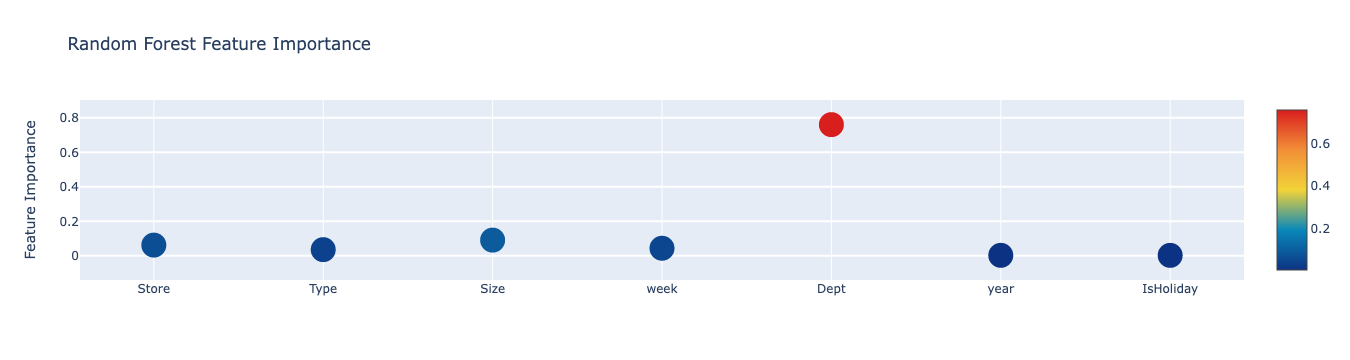

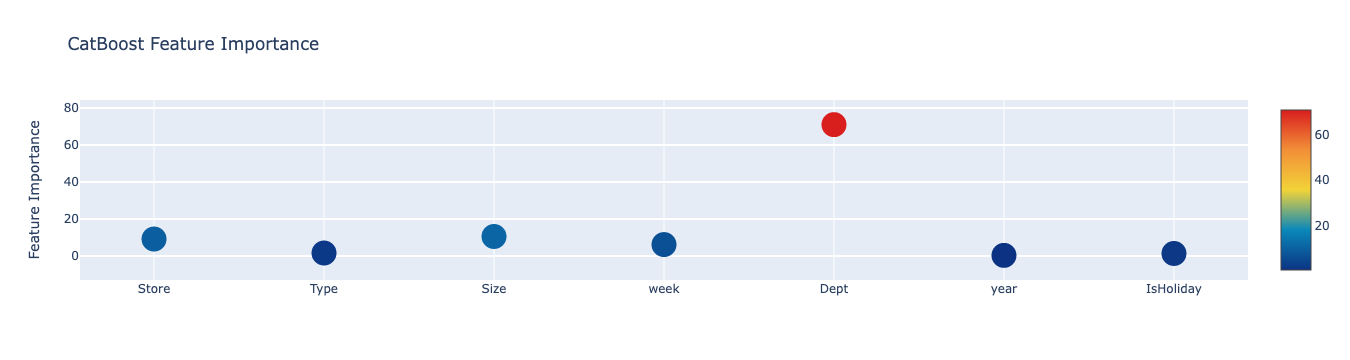

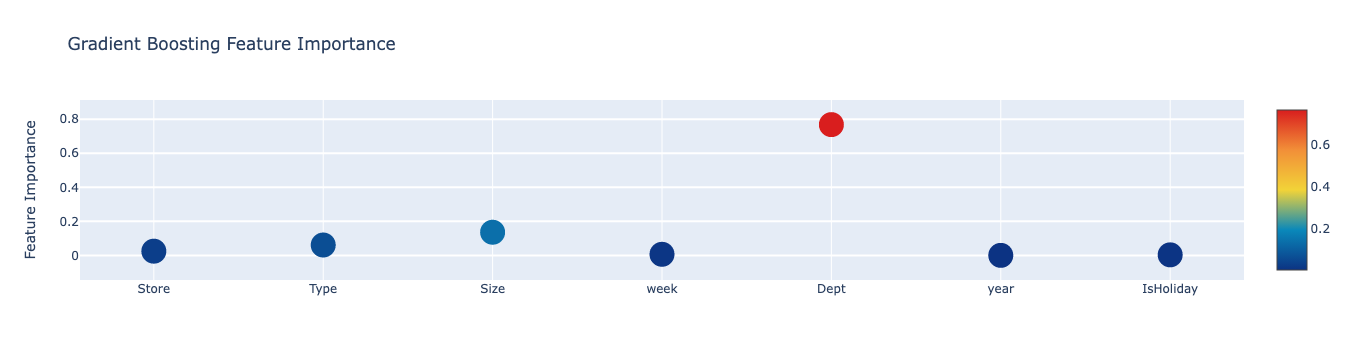

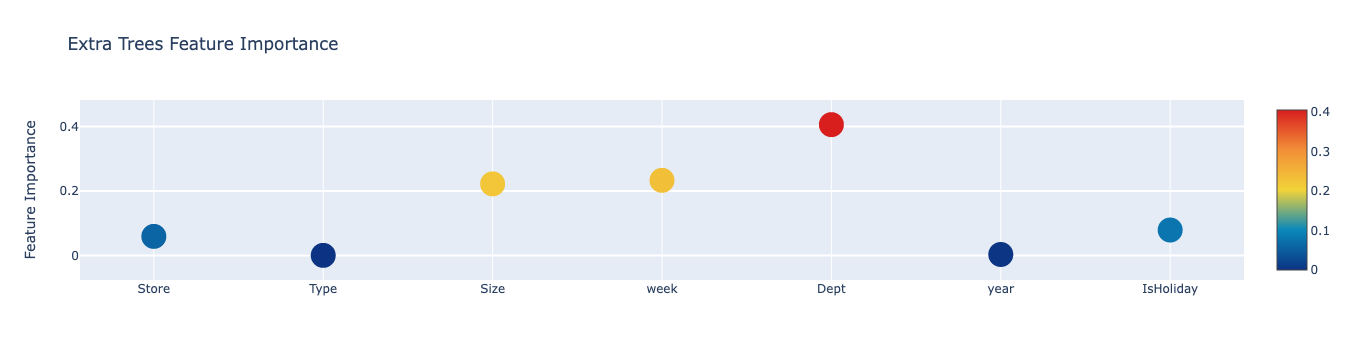

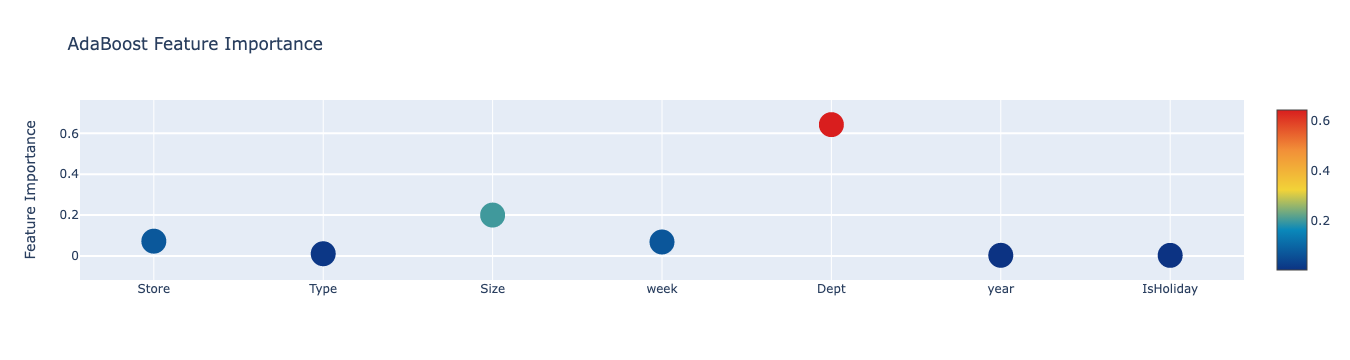

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['CatBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['CatBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'CatBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [201]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'CatBoost': cbr_oof_train.ravel(),                    
     'GradientBoost': gb_oof_train.ravel(),
     'SVMRegression': svr_oof_train.ravel(),
     'KNNRegression': knn_oof_train.ravel()                                  
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,CatBoost,GradientBoost,SVMRegression,KNNRegression
0,33123.812909,33041.020296,33063.816017,37334.787384,42224.953054,7927.446874,20655.436
1,40775.735232,33360.245424,49342.509761,51824.422457,63950.649913,7927.446874,25471.314
2,33244.655025,33047.913952,33063.816017,43033.796653,50418.686775,7927.446875,25891.920
3,32019.844273,33063.154684,33063.816017,29049.807281,33807.830125,7927.446875,21245.670
4,29916.658533,33063.154684,33063.816017,32008.063410,37325.177926,7927.446875,20873.772


In [205]:
train_data[1][0:10]

array([24924.5 , 46039.49, 41595.55, 19403.54, 21827.9 , 21043.39,
       22136.64, 26229.21, 57258.43, 42960.91])

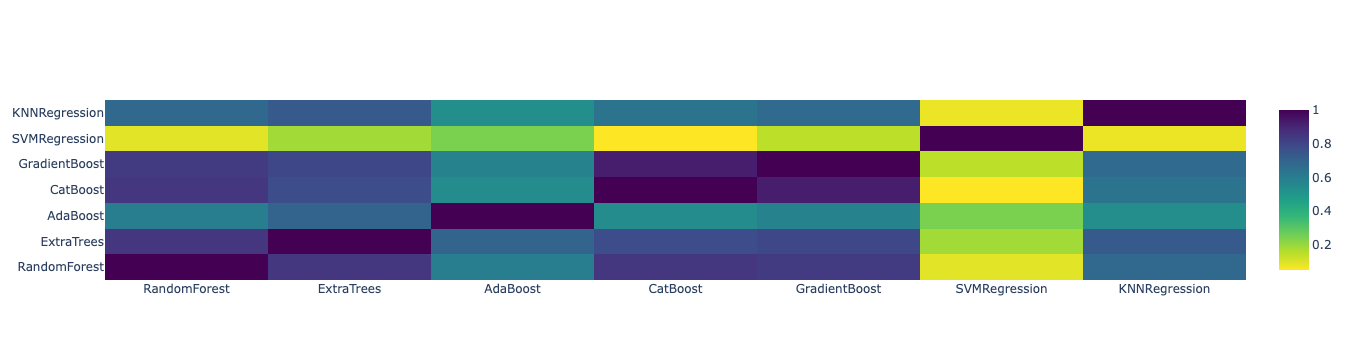

In [206]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [207]:
is_holiday_train = train_data[2].reshape(-1, 1)
is_holiday_test = test_data[2].reshape(-1, 1)

In [208]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train,
                          gb_oof_train, cbr_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test,
                         cbr_oof_test), axis=1)
x_val = np.concatenate(( et_oof_val, rf_oof_val, ada_oof_val, gb_oof_val,
                         cbr_oof_val), axis=1)

In [209]:
class WMAEObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxesxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)
        
        result = []
        for index in range(len(targets)):
            der1 = targets[index] - approxes()

In [210]:
sample_weights = []
for item in train_data[2]:
    if item == 1:
        sample_weights.append(5)
    else:
        sample_weights.append(1)

In [211]:
sample_weights = np.array(sample_weights)

In [221]:
from catboost import metrics
gbm = CatBoostRegressor(
    learning_rate = 0.1,
 n_estimators= 1200,
 max_depth= 5,                
 verbose=0,
 random_state=42,
# loss_function='MAE',
# custom_metric=metrics.MAE(use_weights=True)
    ).fit(x_train, y_train, sample_weight=sample_weights)
predictions_test = gbm.predict(x_test)
predictions_train = gbm.predict(x_train)


In [226]:
rnd = RandomForestRegressor(max_depth=15, random_state=42, n_estimators=150)

In [227]:

rnd.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)

In [228]:
predictions_train = rnd.predict(x_train)
predictions_test = rnd.predict(x_test)
predictions_val = rnd.predict(x_val)

In [229]:
WMAE(is_holiday=test_data[2], real=np.array(test_data[1]), predicted=np.array(predictions_test))

3487.38

In [230]:
WMAE(is_holiday=train_data[2], real=np.array(train_data[1]), predicted=np.array(predictions_train))

2244.79

In [175]:
WMAE(is_holiday=val_data[2], real=np.array(val_data[1]), predicted=np.array(predictions_val))

4423.55

In [ ]:
rnd_model.fit(train_data[0], train_data[1])
catboost_model.fit(train_data[0], train_data[1])
gbt_model.fit(train_data[0], train_data[1])

In [ ]:
rnd_preds = rnd_model.predict(train_data[0])
catboost_preds = catboost_model.predict(train_data[0])
gbt_preds = gbt_model.predict(train_data[0])

In [105]:
rnd_preds = pd.DataFrame(rnd_preds)
catboost_preds = pd.DataFrame(catboost_preds)
gbt_preds = pd.DataFrame(gbt_preds)


In [107]:
new_features_df = pd.concat([rnd_preds, catboost_preds, gbt_preds], axis=1)
new_features_df.columns = ['random_forest', 'catboost', 'gradient_boosting']

In [109]:
model_for_ensemble.fit(new_features_df, train_data[1])


RandomForestRegressor(random_state=42)

In [ ]:
### ARIMA

In [ ]:
# rnd_search.best_params_
# rnd_search.best_score_

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
Depts = data_train.Dept.unique()
differencing_store_dept = []
for dept in Depts:
    Stores = data_train[data_train.Dept==dept].Store.unique()
    for store in Stores:
        temp = data_train[(data_train.Store==store) & (data_train.Dept==dept)]
        try:
            result = adfuller(temp.Weekly_Sales.dropna())
            adf_statistic = result[0]
            p_value = result[1]
            if p_value > 0.05:
                differencing_store_dept.append((store, dept))
        except:
            print("Error", dept, store, temp.shape)

In [ ]:
differencing_store_dept[0]

In [ ]:
temp = data_train[(data_train.Store==1) & (data_train.Dept==1)]

In [ ]:
fig, axes = plt.subplots(3,2, sharex=True)
axes[0, 0].plot(temp.Weekly_Sales); axes[0, 0].set_title("Original Series")
plot_acf(temp.Weekly_Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(temp.Weekly_Sales.diff()); axes[1, 0].set_title("1st Order Differencing")
plot_acf(temp.Weekly_Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(temp.Weekly_Sales.diff().diff()); axes[2, 0].set_title("2nd Order Differencing")
plot_acf(temp.Weekly_Sales.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
print(ndiffs(temp.Weekly_Sales, test='adf'))
print(ndiffs(temp.Weekly_Sales, test='kpss'))
print(ndiffs(temp.Weekly_Sales, test='pp'))


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(temp.Weekly_Sales, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
temp_train = temp[temp['Date']<=break_date1]
temp_val = temp[(temp['Date']>break_date1) & (temp['Date']<=break_date2)]

In [ ]:
temp_train = temp_train.set_index('Date')

In [ ]:
model = ARIMA(temp_train.Weekly_Sales, order=(1, 1, 1))
model_fitted = model.fit()

In [ ]:
result = model_fitted.predict(start=70, end=142)

In [ ]:
pd.DataFrame(result)

In [ ]:
# np.abs(temp_val.Weekly_Sales - pred.prediction).sum()

In [ ]:
# temp_val.Weekly_Sales

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [ ]:
model = pm.auto_arima(
    temp_train.Weekly_Sales, start_p=0, start_q=0,
    test='adf', max_p=10, max_q=10,
    m=1, d=None, seasonal=True,
    start_P=0, D=0,
    trace=True, error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)


In [ ]:
print(model.summary())

In [ ]:
rolling_mean = temp_train.Weekly_Sales.rolling(window = 12).mean()
temp_train['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
temp_train['rolling_mean_diff'].plot(title='after rolling mean & differencing')
ax2 = plt.subplot()
temp_train[['Weekly_Sales', 'rolling_mean_diff']].plot(title='original')
plt.show()

In [ ]:
dftest = adfuller(temp_train['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

In [ ]:
# temp_train = temp_train[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [ ]:
# temp_train = temp_train.set_index('ds')

In [ ]:
# temp_train['ds'] = temp_train.index

In [ ]:
# from prophet import Prophet 
# sales_model = Prophet(seasonality_mode='additive',interval_width=0.95)
# sales_model.fit(temp_train)

In [ ]:
# 

In [ ]:
# sales_forecast = sales_model.make_future_dataframe(periods=12, freq='MS')
# sales_forecast = sales_model.predict(sales_forecast)  

In [ ]:
# sales_forecast

In [ ]:
# plt.figure(figsize=(18, 6))
# sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
# plt.title('Weekly Sales');

In [ ]:
Depts = data_train.Dept.unique()
differencing_store_dept = []
model_mapping = {}
result_pred_train = []
result_pred_val = []
y_train = []
y_val = []
Is_Holiday_train = []
Is_Holiday_val = []

for dept in Depts:
    Stores = data_train[data_train.Dept==dept].Store.unique()
    for store in Stores:
        temp = data_train[(data_train.Store==store) & (data_train.Dept==dept)]
        if temp.shape[0]>30:
            try:
                temp_train = temp[temp.Date<=pd.to_datetime("2011-12-31")]
                temp_val = temp[temp.Date>pd.to_datetime("2011-12-31")]
                model = pm.auto_arima(
                temp_train.Weekly_Sales, start_p=0, start_q=0,
                test='adf', max_p=10, max_q=10,
                m=1, d=None, seasonal=True,
                start_P=0, D=0,
                trace=True, error_action='ignore',
                suppress_warnings=True,
                stepwise=True
                )
                params = model.get_params()
                best_model = ARIMA(temp_train.Weekly_Sales, order=params['order'])
                model_fitted = best_model.fit()
                pred_train = model_fitted.predict()
                pred_train = pd.DataFrame(pred_train)
                # print(pred_train)
                pred_train = pred_train.predicted_mean.values
                result_pred_train.extend(pred_train)
                y_train.extend(temp_train.Weekly_Sales.values)
                Is_Holiday_train.extend(temp_train.IsHoliday.values)
                print("Train from 0 to", temp_train.shape[0])
                if temp_val.shape[0] == 0:
                    continue
                else:
                    try:
                        print(f"Predict from {temp_train.shape[0] + 1} to {temp_train.shape[0] + 1 + temp_val.shape[0]}")
                        print("valid length:", temp_val.shape[0])
                        pred_val = model_fitted.predict(start=temp_train.shape[0] + 1, end=temp_train.shape[0] + temp_val.shape[0])
                        # print(pred_val)
                        pred_val = pd.DataFrame(pred_val)
                        pred_val = pred_val.predicted_mean.values
                        if len(pred_val) != len(temp_val.Weekly_Sales.values):
                            print("Difference between the number of prediction and ground truth in validtion test", len(pred_val), len(temp_val.Weekly_Sales.values))
                        y_val.extend(temp_val.Weekly_Sales.values)
                        Is_Holiday_val.extend(temp_val.IsHoliday.values)
                        result_pred_val.extend(pred_val)
                    except Exception as err:
                        print("Lỗi pred trên tập Validation", dept, store)
            except Exception as err:
                print(temp_train.shape, temp_val.shape)

In [ ]:
len(result_pred_val)

In [ ]:
len(y_val)

In [ ]:
WMAE(is_holiday=Is_Holiday_val, real=np.array(y_val), predicted=np.array(result_pred_val))

In [ ]:
WMAE(is_holiday=Is_Holiday_train, real=np.array(y_train), predicted=np.array(result_pred_train))